# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#Observations
---------------------

* 1) We can see from our regression analysis that there are strong correlations between latitude and temperature.
------------------------------------------------------------------------------------------------------------------------------
* 2) We can see from the regression analysis that there is correlation between latitude and the other relationships, but they have weak correlation. While latitude might have some impact, there are several other geographical factors that might have a greater impact.
------------------------------------------------------------------------------------------------------------------------------
* 3) The number of cities in the Northern Hemisphere data was 598, and 253 in the Southern Hemisphere. This was due to randomly generating the latitude coordinates at the beginning of the code. I feel like we got a more accurate sample of Northern Hemisphere weather data when compared to Southern Hemisphere data. We could run the code a few more times or at greater quantity to see how the data might have changed.


In [ ]:
# import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import requests
import json
from api_keys import weather_api_key
from citipy import citipy
import random
import decimal
import time

## Generate Cities List

In [18]:
#set up latitude and longitude lists
latitude_list = []
longitude_list = []

# Generate 1000 random latitude and logitude values and add them to there respective list
for x in range(0, 2500):
    latitude = float(decimal.Decimal(random.randrange(-9000, 9000))/100)
    longitude = float(decimal.Decimal(random.randrange(-18000, 18000))/100)
    latitude_list.append(latitude)
    longitude_list.append(longitude)

# Set up the Weather DF
weather_df = pd.DataFrame({"Latitude": latitude_list, "Longitude": longitude_list})

# set up list to hold city names and what there country there from
city_list = []
country_list = []

# goes through each value of Latitude and Longitude in the Weather DF and uses the value as inputs to determin there city and country
for a in range(0, len(weather_df["Latitude"])):
    lat_value = weather_df.iloc[a]["Latitude"]
    long_value = weather_df.iloc[a]["Longitude"]    
    city_cord = citipy.nearest_city(lat_value, long_value)
    city_name = city_cord.city_name
    city_list.append(city_name)
    country = city_cord.country_code
    country_list.append(country)

    
# adds the city and country lists into our weather data frame, and then a touch of formatting   
weather_df["City"] = city_list
weather_df["Country"] = country_list
weather_df["City"] = weather_df["City"].str.title()
weather_df["Country"] = weather_df["Country"].str.upper()


#drop duplicates duplicates
weather_df = weather_df.drop_duplicates(subset=["City", "Country"], keep="first")
weather_df = weather_df.reset_index(drop=True)

print("Total number of unique cities in weather dataframe is: " + str(len(weather_df.index)))


Total number of unique cities in weather dataframe is: 928


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [126]:
# Set up list for variables we want
temperature_list = [] 
humidity_list = []
cloudiness_list = []
wind_speed_list = []
date_list = []
# Base URL before adding variable componets
url = "http://api.openweathermap.org/data/2.5/weather?"

    

for target in range(0, len(weather_df.index)):
    
    # Select city on weather DF, and formate for proper url code in event city has spaces in name
    display_city = weather_df.iloc[target]["City"]
    display_country = weather_df.iloc[target]["Country"]
    target_city = weather_df.iloc[target]["City"]
    target_city = target_city.replace(" ","+")
    
    # Build query URL
    query_url = f"{url}appid={weather_api_key}&q={target_city}&units=imperial"
    
    # Use URL to make a request of information, bring back in the json format, and print URL
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    print(f"Currently on {(target + 1)} out of {(len(weather_df.index))} |::| City: {display_city}, {display_country}")
    print(query_url)
    
    # This will collect and store desired information, but if there is an error it will print a line and move on to next
    try:
        cities_temp = weather_json["main"]["temp"]
        temperature_list.append(cities_temp)
        
        cities_humid = weather_json["main"]["humidity"]
        humidity_list.append(cities_humid)
        
        cities_cloud = weather_json["clouds"]["all"]
        cloudiness_list.append(cities_cloud)
        
        cities_wind = weather_json["wind"]["speed"]
        wind_speed_list.append(cities_wind)
        
        cities_date = weather_json["dt"]
        date_list.append(cities_date)
    except:
        print("I'm afraid I can't do that Dave. There seems to have been an error. Let's try the next city.")
        
        # Usuccessful API request will result in a blank value in list that will throw off list alignment
        # We will but in a dummy value in its place to clean out later
        temperature_list.append("Error")
        humidity_list.append("Error")
        cloudiness_list.append("Error")
        wind_speed_list.append("Error")
        date_list.append("Error")
    print()
    
    # Add a sleep timer to prevent my API requests from going over 60 per min and causing a 1 hour lock out.
    time.sleep(1) # in seconds



Currently on 1 out of 928 |::| City: Souillac, MU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Souillac&units=imperial

Currently on 2 out of 928 |::| City: Cape Town, ZA
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Cape+Town&units=imperial

Currently on 3 out of 928 |::| City: Codrington, AG
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Codrington&units=imperial

Currently on 4 out of 928 |::| City: Rikitea, PF
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Rikitea&units=imperial

Currently on 5 out of 928 |::| City: Montague, CA
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Montague&units=imperial

Currently on 6 out of 928 |::| City: Margate, ZA
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Margate&units=imperial

Currently on 7 out o

Currently on 50 out of 928 |::| City: Longyearbyen, SJ
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Longyearbyen&units=imperial

Currently on 51 out of 928 |::| City: Hobart, AU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Hobart&units=imperial

Currently on 52 out of 928 |::| City: Aklavik, CA
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Aklavik&units=imperial

Currently on 53 out of 928 |::| City: Luderitz, NA
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Luderitz&units=imperial

Currently on 54 out of 928 |::| City: Kungurtug, RU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Kungurtug&units=imperial

Currently on 55 out of 928 |::| City: Shebalino, RU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Shebalino&units=imperial

Currently 

Currently on 99 out of 928 |::| City: Aflu, DZ
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Aflu&units=imperial
I'm afraid I can't do that Dave. There seems to have been an error. Let's try the next city.

Currently on 100 out of 928 |::| City: Yerofey Pavlovich, RU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Yerofey+Pavlovich&units=imperial

Currently on 101 out of 928 |::| City: Kapaa, US
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Kapaa&units=imperial

Currently on 102 out of 928 |::| City: Clyde River, CA
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Clyde+River&units=imperial

Currently on 103 out of 928 |::| City: Kaitangata, NZ
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Kaitangata&units=imperial

Currently on 104 out of 928 |::| City: Simdega, IN
http://api.openwea

Currently on 146 out of 928 |::| City: Illoqqortoormiut, GL
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Illoqqortoormiut&units=imperial
I'm afraid I can't do that Dave. There seems to have been an error. Let's try the next city.

Currently on 147 out of 928 |::| City: Hobyo, SO
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Hobyo&units=imperial

Currently on 148 out of 928 |::| City: Chillicothe, US
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Chillicothe&units=imperial

Currently on 149 out of 928 |::| City: Amderma, RU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Amderma&units=imperial
I'm afraid I can't do that Dave. There seems to have been an error. Let's try the next city.

Currently on 150 out of 928 |::| City: Chatellerault, FR
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f5

Currently on 192 out of 928 |::| City: Vardo, NO
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Vardo&units=imperial

Currently on 193 out of 928 |::| City: Severomuysk, RU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Severomuysk&units=imperial

Currently on 194 out of 928 |::| City: Haibowan, CN
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Haibowan&units=imperial
I'm afraid I can't do that Dave. There seems to have been an error. Let's try the next city.

Currently on 195 out of 928 |::| City: Grindavik, IS
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Grindavik&units=imperial

Currently on 196 out of 928 |::| City: Saint-Georges, GF
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Saint-Georges&units=imperial

Currently on 197 out of 928 |::| City: Kavaratti, IN
http://api.openwe

Currently on 240 out of 928 |::| City: Maumere, ID
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Maumere&units=imperial

Currently on 241 out of 928 |::| City: Suba, PH
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Suba&units=imperial

Currently on 242 out of 928 |::| City: Magalia, US
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Magalia&units=imperial

Currently on 243 out of 928 |::| City: Manado, ID
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Manado&units=imperial

Currently on 244 out of 928 |::| City: Golden, CA
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Golden&units=imperial

Currently on 245 out of 928 |::| City: Ijaki, KI
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Ijaki&units=imperial
I'm afraid I can't do that Dave. Ther

Currently on 289 out of 928 |::| City: Port Lincoln, AU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Port+Lincoln&units=imperial

Currently on 290 out of 928 |::| City: Mendahara, ID
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Mendahara&units=imperial
I'm afraid I can't do that Dave. There seems to have been an error. Let's try the next city.

Currently on 291 out of 928 |::| City: Benguela, AO
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Benguela&units=imperial

Currently on 292 out of 928 |::| City: Turukhansk, RU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Turukhansk&units=imperial

Currently on 293 out of 928 |::| City: Black Diamond, CA
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Black+Diamond&units=imperial

Currently on 294 out of 928 |::| City: Port Hardy, CA
http

Currently on 337 out of 928 |::| City: Saint-Pierre, PM
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Saint-Pierre&units=imperial

Currently on 338 out of 928 |::| City: Fevralsk, RU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Fevralsk&units=imperial
I'm afraid I can't do that Dave. There seems to have been an error. Let's try the next city.

Currently on 339 out of 928 |::| City: Nouadhibou, MR
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Nouadhibou&units=imperial

Currently on 340 out of 928 |::| City: Malur, IN
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Malur&units=imperial

Currently on 341 out of 928 |::| City: Chokurdakh, RU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Chokurdakh&units=imperial

Currently on 342 out of 928 |::| City: Kazalinsk, KZ
http://api.openweat

Currently on 384 out of 928 |::| City: Bahir Dar, ET
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Bahir+Dar&units=imperial

Currently on 385 out of 928 |::| City: Vertientes, CU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Vertientes&units=imperial

Currently on 386 out of 928 |::| City: Lakes Entrance, AU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Lakes+Entrance&units=imperial

Currently on 387 out of 928 |::| City: Miyako, JP
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Miyako&units=imperial

Currently on 388 out of 928 |::| City: Aldan, RU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Aldan&units=imperial

Currently on 389 out of 928 |::| City: Hami, CN
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Hami&units=imperial

Currently 

Currently on 432 out of 928 |::| City: Jimeta, NG
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Jimeta&units=imperial

Currently on 433 out of 928 |::| City: San Jose, BO
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=San+Jose&units=imperial

Currently on 434 out of 928 |::| City: Kodino, RU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Kodino&units=imperial

Currently on 435 out of 928 |::| City: Abilene, US
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Abilene&units=imperial

Currently on 436 out of 928 |::| City: Ngukurr, AU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Ngukurr&units=imperial
I'm afraid I can't do that Dave. There seems to have been an error. Let's try the next city.

Currently on 437 out of 928 |::| City: Vila Franca Do Campo, PT
http://api.openweathermap.org/

Currently on 477 out of 928 |::| City: Veraval, IN
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Veraval&units=imperial

Currently on 478 out of 928 |::| City: Antalaha, MG
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Antalaha&units=imperial

Currently on 479 out of 928 |::| City: Ampanihy, MG
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Ampanihy&units=imperial

Currently on 480 out of 928 |::| City: Ornskoldsvik, SE
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Ornskoldsvik&units=imperial

Currently on 481 out of 928 |::| City: Qaqortoq, GL
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Qaqortoq&units=imperial

Currently on 482 out of 928 |::| City: Kabelvag, NO
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Kabelvag&units=imperial

Curr

Currently on 524 out of 928 |::| City: Karaul, RU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Karaul&units=imperial
I'm afraid I can't do that Dave. There seems to have been an error. Let's try the next city.

Currently on 525 out of 928 |::| City: Ilo, PE
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Ilo&units=imperial

Currently on 526 out of 928 |::| City: Hoquiam, US
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Hoquiam&units=imperial

Currently on 527 out of 928 |::| City: Riachao Das Neves, BR
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Riachao+Das+Neves&units=imperial

Currently on 528 out of 928 |::| City: Dumas, US
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Dumas&units=imperial

Currently on 529 out of 928 |::| City: Bushehr, IR
http://api.openweathermap.org/data/

Currently on 571 out of 928 |::| City: Parasia, IN
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Parasia&units=imperial

Currently on 572 out of 928 |::| City: San Quintin, MX
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=San+Quintin&units=imperial

Currently on 573 out of 928 |::| City: Mentok, ID
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Mentok&units=imperial
I'm afraid I can't do that Dave. There seems to have been an error. Let's try the next city.

Currently on 574 out of 928 |::| City: Borba, BR
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Borba&units=imperial

Currently on 575 out of 928 |::| City: Rach Gia, VN
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Rach+Gia&units=imperial

Currently on 576 out of 928 |::| City: Rorvik, NO
http://api.openweathermap.org/data/2.5

Currently on 619 out of 928 |::| City: Batagay-Alyta, RU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Batagay-Alyta&units=imperial

Currently on 620 out of 928 |::| City: Kirkconnel, GB
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Kirkconnel&units=imperial

Currently on 621 out of 928 |::| City: Wukari, NG
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Wukari&units=imperial

Currently on 622 out of 928 |::| City: Vershino-Shakhtaminskiy, RU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Vershino-Shakhtaminskiy&units=imperial

Currently on 623 out of 928 |::| City: Sabha, LY
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Sabha&units=imperial

Currently on 624 out of 928 |::| City: Caravelas, BR
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=

Currently on 668 out of 928 |::| City: Alice Springs, AU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Alice+Springs&units=imperial

Currently on 669 out of 928 |::| City: Yueyang, CN
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Yueyang&units=imperial

Currently on 670 out of 928 |::| City: Bulls, NZ
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Bulls&units=imperial

Currently on 671 out of 928 |::| City: Flinders, AU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Flinders&units=imperial

Currently on 672 out of 928 |::| City: Taltal, CL
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Taltal&units=imperial

Currently on 673 out of 928 |::| City: Smithers, CA
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Smithers&units=imperial

Currently on

Currently on 717 out of 928 |::| City: Paradwip, IN
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Paradwip&units=imperial
I'm afraid I can't do that Dave. There seems to have been an error. Let's try the next city.

Currently on 718 out of 928 |::| City: Ust-Kulom, RU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Ust-Kulom&units=imperial

Currently on 719 out of 928 |::| City: Verkhnyaya Inta, RU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Verkhnyaya+Inta&units=imperial

Currently on 720 out of 928 |::| City: Marquette, US
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Marquette&units=imperial

Currently on 721 out of 928 |::| City: Tarudant, MA
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Tarudant&units=imperial
I'm afraid I can't do that Dave. There seems to have been an erro

Currently on 766 out of 928 |::| City: Gamba, GA
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Gamba&units=imperial

Currently on 767 out of 928 |::| City: El Alto, PE
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=El+Alto&units=imperial

Currently on 768 out of 928 |::| City: Maneadero, MX
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Maneadero&units=imperial

Currently on 769 out of 928 |::| City: Anahuac, MX
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Anahuac&units=imperial

Currently on 770 out of 928 |::| City: Coello, CO
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Coello&units=imperial

Currently on 771 out of 928 |::| City: Monrovia, LR
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Monrovia&units=imperial

Currently on 772 out o

Currently on 813 out of 928 |::| City: Gergebil, RU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Gergebil&units=imperial

Currently on 814 out of 928 |::| City: Qurayyat, OM
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Qurayyat&units=imperial

Currently on 815 out of 928 |::| City: Damghan, IR
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Damghan&units=imperial

Currently on 816 out of 928 |::| City: Borogontsy, RU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Borogontsy&units=imperial

Currently on 817 out of 928 |::| City: Tabuk, SA
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Tabuk&units=imperial

Currently on 818 out of 928 |::| City: Khandyga, RU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Khandyga&units=imperial

Currently on 8

Currently on 862 out of 928 |::| City: Honiara, SB
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Honiara&units=imperial

Currently on 863 out of 928 |::| City: Patacamaya, BO
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Patacamaya&units=imperial

Currently on 864 out of 928 |::| City: Ust-Kuyga, RU
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Ust-Kuyga&units=imperial

Currently on 865 out of 928 |::| City: Coos Bay, US
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Coos+Bay&units=imperial

Currently on 866 out of 928 |::| City: Kupang, ID
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Kupang&units=imperial

Currently on 867 out of 928 |::| City: Utica, US
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Utica&units=imperial

Currently on 868

Currently on 910 out of 928 |::| City: Freeport, US
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Freeport&units=imperial

Currently on 911 out of 928 |::| City: Mana, GF
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Mana&units=imperial

Currently on 912 out of 928 |::| City: Caxito, AO
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Caxito&units=imperial

Currently on 913 out of 928 |::| City: Dotnuva, LT
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Dotnuva&units=imperial

Currently on 914 out of 928 |::| City: Kodinar, IN
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Kodinar&units=imperial

Currently on 915 out of 928 |::| City: Am Timan, TD
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Am+Timan&units=imperial

Currently on 916 out of 92

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [127]:
# Add collected weather data to Weather DF
weather_df["Temperature (F)"] = temperature_list
weather_df["Humidity (%)"] = humidity_list
weather_df["Cloud Cover (%)"] = cloudiness_list
weather_df["Wind Speed (MPH)"] = wind_speed_list
weather_df["Date (UTC)"] = date_list

# Drop rows where we assigned Error too, because there was no data to pull
weather_df_v2 = weather_df[weather_df["Temperature (F)"] != "Error"]

# Reset Index after removing errors
weather_df_v2 = weather_df_v2.reset_index(drop=True)



# Save DF as .csv
weather_df_v2.to_csv("weather_data.csv")

print("Total number of unique cities in weather dataframe is: " + str(len(weather_df_v2.index)))
weather_df_v2.head(5)

Total number of unique cities in weather dataframe is: 851


Latitude  Longitude        City Country Temperature (F) Humidity (%)  \
0    -49.34      71.83    Souillac      MU            78.8           65   
1    -63.69     -12.97   Cape Town      ZA           66.11           72   
2     26.90     -45.04  Codrington      AG           56.26           71   
3    -50.16    -121.36     Rikitea      PF           75.06           84   
4     46.39     -62.78    Montague      CA           41.47           79   

  Cloud Cover (%) Wind Speed (MPH)  Date (UTC)  
0              75            19.46  1603694057  
1               0              4.7  1603694058  
2               0            21.97  1603694059  
3             100            19.33  1603694060  
4             100             2.21  1603694061

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [128]:
#  Get list of the indices of cities that have humidity over 100%.

over_100 = weather_df_v2.index[weather_df_v2["Humidity (%)"] > 100].tolist()
print(over_100)

[]


In [129]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df_v2.drop(over_100)


clean_city_data = clean_city_data.reset_index(drop=True)
print("Total number of unique cities in weather dataframe is: " + str(len(weather_df_v2.index)))
clean_city_data.head(100)

Total number of unique cities in weather dataframe is: 851


Latitude  Longitude           City Country Temperature (F) Humidity (%)  \
0     -49.34      71.83       Souillac      MU            78.8           65   
1     -63.69     -12.97      Cape Town      ZA           66.11           72   
2      26.90     -45.04     Codrington      AG           56.26           71   
3     -50.16    -121.36        Rikitea      PF           75.06           84   
4      46.39     -62.78       Montague      CA           41.47           79   
..       ...        ...            ...     ...             ...          ...   
95     69.86     -80.09    Clyde River      CA            12.2           78   
96    -63.80     175.99     Kaitangata      NZ           51.01           63   
97     22.68      84.36        Simdega      IN           86.16           35   
98     10.20    -163.16  Makakilo City      US           77.38           78   
99     50.26     -78.40       Matagami      CA            26.6          100   

   Cloud Cover (%) Wind Speed (MPH)  Date (UTC)  
0               75            19.46  1603694057  
1                0              4.7  1603694058  
2                0            21.97  1603694059  
3              100            19.33  1603694060  
4              100             2.21  1603694061  
..             ...              ...         ...  
95              90            17.22  1603694400  
96              48             1.99  1603694401  
97               0             5.73  1603694402  
98               1             2.01  1603694122  
99              90             3.36  1603694405  

[100 rows x 9 columns]

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

This plot is comparing the latitude and temperature of each city in the data frame. We can see that as latitude is closer to zero, the equator, the higher the temperature is.


<function matplotlib.pyplot.show(*args, **kw)>

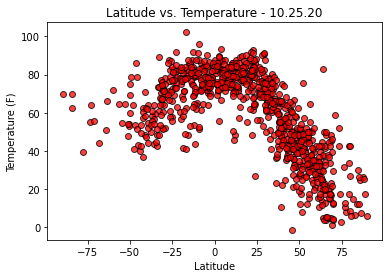

In [130]:
# Set Axises
x_axis = clean_city_data["Latitude"]
y_axis = clean_city_data["Temperature (F)"]

# Create Scatter Plot
fig_1 = plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

# Set Lables and other
plt.title("Latitude vs. Temperature - 10.25.20")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

fig_1.figure.savefig('lat_v_temp.png')

print("This plot is comparing the latitude and temperature of each city in the data frame. We can see that as latitude is closer to zero, the equator, the higher the temperature is.")

plt.show

## Latitude vs. Humidity Plot

This plot is comparing the latitude and humidity of each city in the data frame. There does not seem to be much of a relationship.


<function matplotlib.pyplot.show(*args, **kw)>

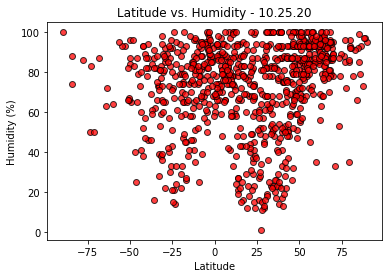

In [131]:
# Set Axises
x_axis = clean_city_data["Latitude"]
y_axis = clean_city_data["Humidity (%)"]

# Create Scatter Plot
fig_2 = plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

# Set Lables and other
plt.title("Latitude vs. Humidity - 10.25.20")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

fig_2.figure.savefig('lat_v_humid.png')

print("This plot is comparing the latitude and humidity of each city in the data frame. There does not seem to be much of a relationship.")



plt.show

## Latitude vs. Cloudiness Plot

This plot is comparing the latitude and cloudiness of each city in the data frame. There does not seem to be much of a relationship.


<function matplotlib.pyplot.show(*args, **kw)>

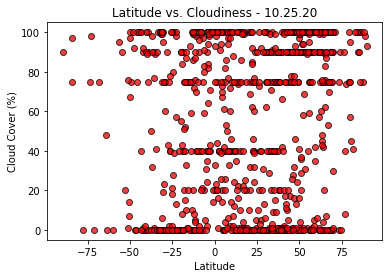

In [132]:
# Set Axises
x_axis = clean_city_data["Latitude"]
y_axis = clean_city_data["Cloud Cover (%)"]

# Create Scatter Plot
fig_3 = plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

# Set Lables and other
plt.title("Latitude vs. Cloudiness - 10.25.20")
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover (%)")

fig_3.figure.savefig('lat_v_cloud.png')


print("This plot is comparing the latitude and cloudiness of each city in the data frame. There does not seem to be much of a relationship.")



plt.show

## Latitude vs. Wind Speed Plot

This plot is comparing the latitude and wind speed of each city in the data frame. There does not seem to be much of a relationship.


<function matplotlib.pyplot.show(*args, **kw)>

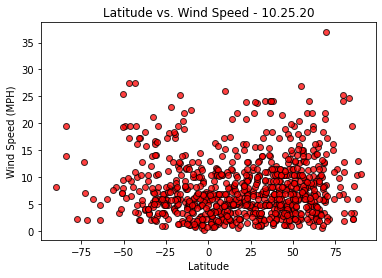

In [133]:
# Set Axises
x_axis = clean_city_data["Latitude"]
y_axis = clean_city_data["Wind Speed (MPH)"]

# Create Scatter Plot
fig_4 = plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

# Set Lables and other
plt.title("Latitude vs. Wind Speed - 10.25.20")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")

fig_4.figure.savefig('lat_v_wind.png')


print("This plot is comparing the latitude and wind speed of each city in the data frame. There does not seem to be much of a relationship.")




plt.show

## Linear Regression

In [134]:
# Set Clean City DF to North and South Hemispheres
north_hem = clean_city_data[clean_city_data["Latitude"] > 0]
south_hem = clean_city_data[clean_city_data["Latitude"] < 0]
print("Total number of unique cities in Northern Hemisphere is: " + str(len(north_hem.index)))
print("Total number of unique cities in Southern Hemisphere is: " + str(len(south_hem.index)))

Total number of unique cities in Northern Hemisphere is: 598
Total number of unique cities in Southern Hemisphere is: 253


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is -0.85
This plot is comparing the latitude and temperature of each city in the data frame. We can see that as latitude is closer to zero, the equator, the higher the temperature is.


<function matplotlib.pyplot.show(*args, **kw)>

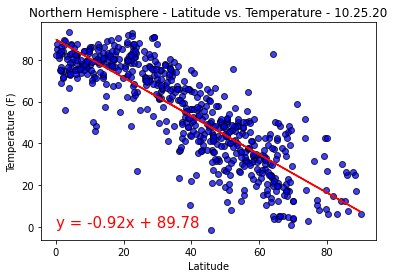

In [135]:
# Set Axises

x_axis = north_hem["Latitude"]
y_axis = north_hem["Temperature (F)"]

# Create Scatter Plot
fig_5 = plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Set Lables and other
plt.title("Northern Hemisphere - Latitude vs. Temperature - 10.25.20")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")


# calculate correlation coefficient
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# calculates the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis.astype(float) ,y_axis.astype(float))
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")




fig_5.figure.savefig('n_hem_lat_v_temp.png')

print("This plot is comparing the latitude and temperature of each city in the data frame. We can see that as latitude is closer to zero, the equator, the higher the temperature is.")

plt.show

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is 0.51
This plot is comparing the latitude and temperature of each city in the data frame. We can see that as latitude is closer to zero, the equator, the higher the temperature is.


<function matplotlib.pyplot.show(*args, **kw)>

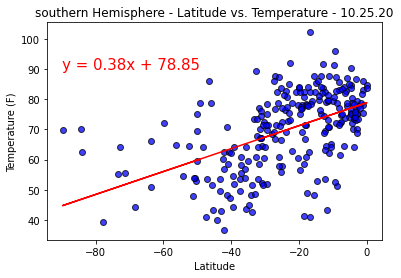

In [136]:
# Set Axises

x_axis = south_hem["Latitude"]
y_axis = south_hem["Temperature (F)"]

# Create Scatter Plot
fig_6 = plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Set Lables and other
plt.title("southern Hemisphere - Latitude vs. Temperature - 10.25.20")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")


# calculate correlation coefficient
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# calculates the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis.astype(float) ,y_axis.astype(float))
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-90, 90),fontsize=15,color="red")




fig_6.figure.savefig('s_hem_lat_v_temp.png')

print("This plot is comparing the latitude and temperature of each city in the data frame. We can see that as latitude is closer to zero, the equator, the higher the temperature is.")

plt.show

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.28
This plot is comparing the latitude and humidity of each city in the data frame. There does not seem to be much of a relationship.


<function matplotlib.pyplot.show(*args, **kw)>

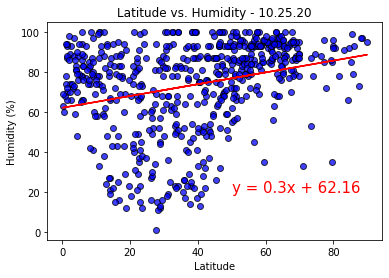

In [137]:
# Set Axises
x_axis = north_hem["Latitude"]
y_axis = north_hem["Humidity (%)"]

# Create Scatter Plot
fig_7 = plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Set Lables and other
plt.title("Latitude vs. Humidity - 10.25.20")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# calculate correlation coefficient
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# calculates the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis.astype(float) ,y_axis.astype(float))
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")



fig_7.figure.savefig('n_hem_lat_v_humid.png')

print("This plot is comparing the latitude and humidity of each city in the data frame. There does not seem to be much of a relationship.")



plt.show

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.06
This plot is comparing the latitude and humidity of each city in the data frame. There does not seem to be much of a relationship.


<function matplotlib.pyplot.show(*args, **kw)>

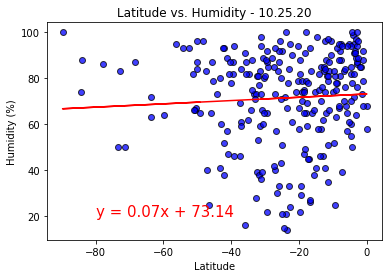

In [138]:
# Set Axises
x_axis = south_hem["Latitude"]
y_axis = south_hem["Humidity (%)"]

# Create Scatter Plot
fig_8 = plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Set Lables and other
plt.title("Latitude vs. Humidity - 10.25.20")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


# calculate correlation coefficient
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# calculates the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis.astype(float) ,y_axis.astype(float))
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-80,20),fontsize=15,color="red")


fig_8.figure.savefig('s_hem_lat_v_humid.png')

print("This plot is comparing the latitude and humidity of each city in the data frame. There does not seem to be much of a relationship.")



plt.show

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.22
This plot is comparing the latitude and cloudiness of each city in the data frame. There does not seem to be much of a relationship.


<function matplotlib.pyplot.show(*args, **kw)>

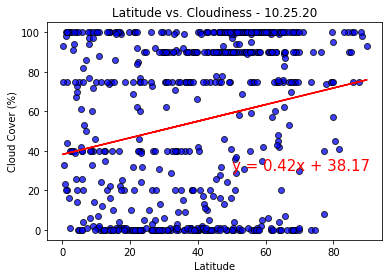

In [139]:
# Set Axises
x_axis = north_hem["Latitude"]
y_axis = north_hem["Cloud Cover (%)"]

# Create Scatter Plot
fig_9 = plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Set Lables and other
plt.title("Latitude vs. Cloudiness - 10.25.20")
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover (%)")

# calculate correlation coefficient
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# calculates the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis.astype(float) ,y_axis.astype(float))
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(50,30),fontsize=15,color="red")



fig_9.figure.savefig('n_hem_lat_v_cloud.png')


print("This plot is comparing the latitude and cloudiness of each city in the data frame. There does not seem to be much of a relationship.")



plt.show

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.07
This plot is comparing the latitude and cloudiness of each city in the data frame. There does not seem to be much of a relationship.


<function matplotlib.pyplot.show(*args, **kw)>

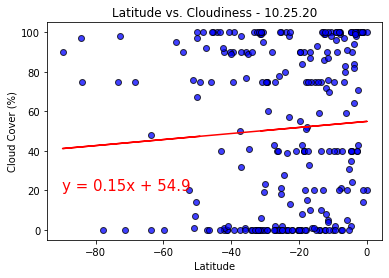

In [140]:
# Set Axises
x_axis = south_hem["Latitude"]
y_axis = south_hem["Cloud Cover (%)"]

# Create Scatter Plot
fig_10 = plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Set Lables and other
plt.title("Latitude vs. Cloudiness - 10.25.20")
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover (%)")

# calculate correlation coefficient
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# calculates the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis.astype(float) ,y_axis.astype(float))
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-90,20),fontsize=15,color="red")




fig_10.figure.savefig('s_hem_lat_v_cloud.png')


print("This plot is comparing the latitude and cloudiness of each city in the data frame. There does not seem to be much of a relationship.")



plt.show

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is 0.16
This plot is comparing the latitude and wind speed of each city in the data frame. There does not seem to be much of a relationship.


<function matplotlib.pyplot.show(*args, **kw)>

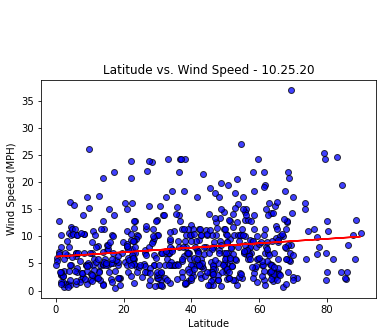

In [141]:
# Set Axises
x_axis = north_hem["Latitude"]
y_axis = north_hem["Wind Speed (MPH)"]

# Create Scatter Plot
fig_11 = plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Set Lables and other
plt.title("Latitude vs. Wind Speed - 10.25.20")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")

# calculate correlation coefficient
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# calculates the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis.astype(float) ,y_axis.astype(float))
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")


fig_11.figure.savefig('n_hem_lat_v_wind.png')


print("This plot is comparing the latitude and wind speed of each city in the data frame. There does not seem to be much of a relationship.")




plt.show

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.22
This plot is comparing the latitude and wind speed of each city in the data frame. There does not seem to be much of a relationship.


<function matplotlib.pyplot.show(*args, **kw)>

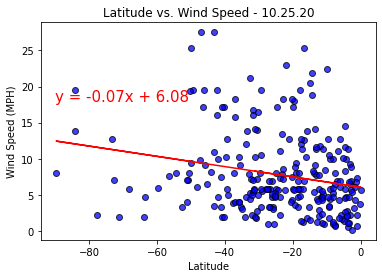

In [142]:
# Set Axises
x_axis = south_hem["Latitude"]
y_axis = south_hem["Wind Speed (MPH)"]

# Create Scatter Plot
fig_12 = plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Set Lables and other
plt.title("Latitude vs. Wind Speed - 10.25.20")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")

# calculate correlation coefficient
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# calculates the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis.astype(float) ,y_axis.astype(float))
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-90,18),fontsize=15,color="red")


fig_12.figure.savefig('s_hem_lat_v_wind.png')


print("This plot is comparing the latitude and wind speed of each city in the data frame. There does not seem to be much of a relationship.")




plt.show